# Interactive influence lines #

![figuur 1](data/data_interactive_influence_lines/Structure.gif)

In [15]:
import sympy as sp

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import widgets, interact

In [17]:
EI, x = sp.symbols('EI, x',real=True)

In [18]:
Av, Bv, Cv = sp.symbols('Av, Bv, Cv',real=True)
a, b, L1, L2 = sp.symbols('a, b, L1, L2',positive=True,real=True)
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')

## Find M- and V-line ##

Piecewise((0, x > 10), (21*(x - 10)/250, x > 5), (2 - 121*x/250, x > 2), (129*x/250, x > 0), (0, True))

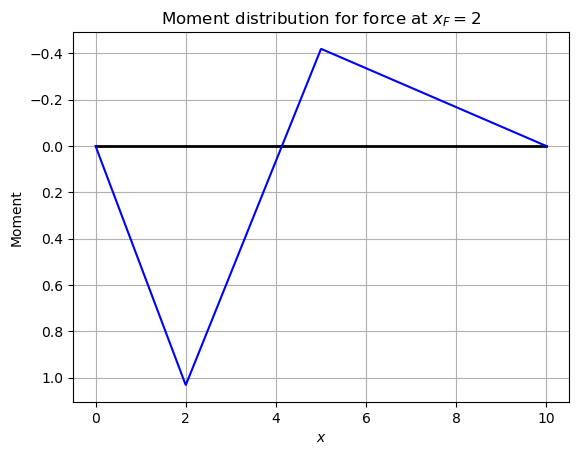

In [19]:
%matplotlib inline
q = Bv * sp.SingularityFunction(x,L1,-1) - Av * sp.SingularityFunction(x,0,-1) - Cv * sp.SingularityFunction(x,L1+L2,-1) + 1 * sp.SingularityFunction(x,a,-1)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(phi,x)+C4
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq3 = sp.Eq(w.subs(x,L1+L2),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1+L2),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
V_sol = V.subs(sol)
V_subs = V_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
V_numpy = sp.lambdify([L1,L2,a,EI,x],V_sol.rewrite(sp.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(M_subs.rewrite(sp.Piecewise)))
M_numpy = sp.lambdify([L1,L2,a,EI,x],M_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('Moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Moment distribution for force at $x_F =  2 $'
axs.set_title(title0);

Piecewise((-x**2/2 + 11*x - 60, x > 10), ((-4*x**2 + 65*x - 250)/8, x > 5), (x*(15 - 4*x)/8, x > 0), (-x*(x + 2)/2, True))

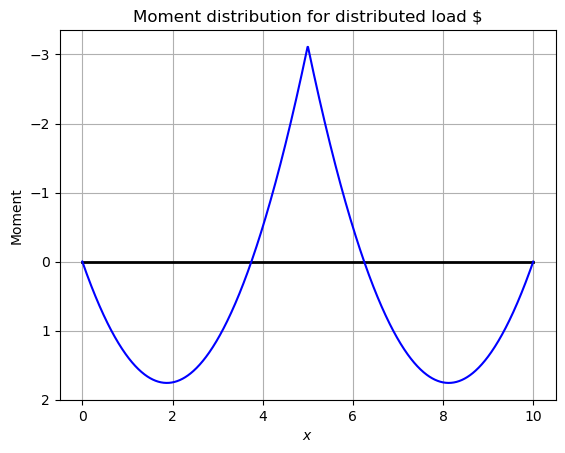

In [20]:
%matplotlib inline
q = Bv * sp.SingularityFunction(x,L1,-1) - Av * sp.SingularityFunction(x,0,-1) - Cv * sp.SingularityFunction(x,L1+L2,-1) + 1
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(phi,x)+C4
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq3 = sp.Eq(w.subs(x,L1+L2),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1+L2),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
V_sol = V.subs(sol)
V_subs = V_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
V_numpy = sp.lambdify([L1,L2,a,EI,x],V_sol.rewrite(sp.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(M_subs.rewrite(sp.Piecewise)))
M_numpy = sp.lambdify([L1,L2,a,EI,x],M_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('Moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Moment distribution for distributed load $'
axs.set_title(title0);

Piecewise((11 - x, x > 10), (65/8 - x, x > 5), (15/8 - x, x > 0), (-(x + 1), True))

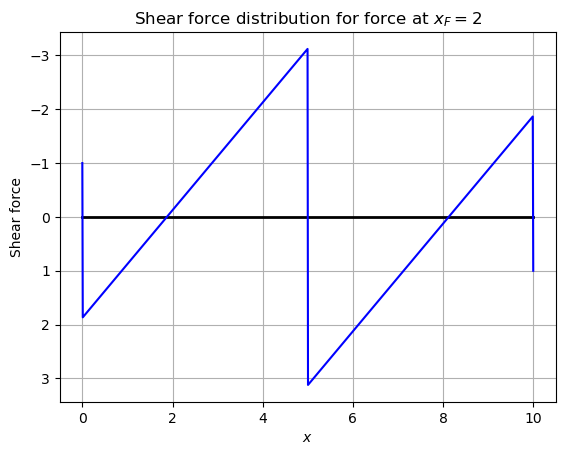

In [21]:
display(sp.simplify(V_subs.rewrite(sp.Piecewise)))

x_plot = np.linspace(0,10.00001,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('Shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Shear force distribution for force at $x_F =  2 $'
axs.set_title(title0);

##  Finding influence line for M ##

Piecewise((x/10 - 1, x > 10), (-x**3/250 + 3*x**2/25 - 11*x/10 + 3, x > 5), (x**3/250 - x/2 + 2, x > 2), (x*(x**2 + 125)/250, x > 0), (x/2, True))

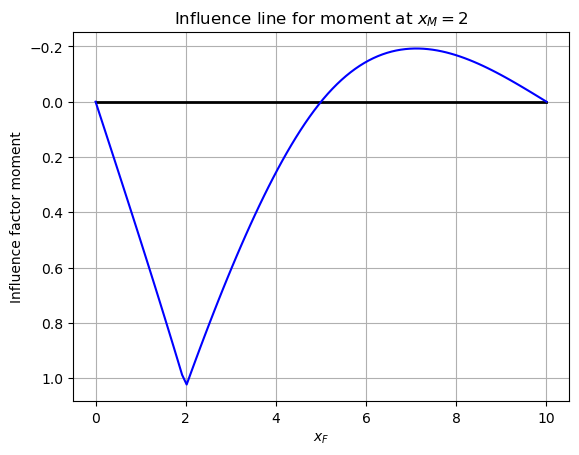

In [34]:
%matplotlib inline
q = Bv * sp.SingularityFunction(x,L1,-1) - Av * sp.SingularityFunction(x,0,-1) - Cv * sp.SingularityFunction(x,L1+L2,-1)
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 - sp.SingularityFunction(x,a,0)
w = sp.integrate(phi,x)+C4
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq3 = sp.Eq(w.subs(x,L1+L2),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1+L2),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
M_inf_numpy = sp.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,10,100)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_inf_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for moment at $x_M = 2$'
axs.set_title(title0);

Piecewise((a*(15 - 4*a)/8, a < 5), ((-4*a**2 + 65*a - 250)/8, a < 10), (0, True))

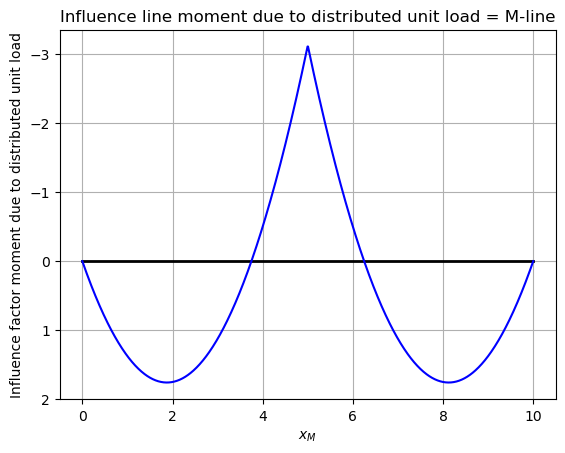

In [37]:
%matplotlib inline
M_line_q = sp.integrate(w_sol.subs([(L1,5),(L2,5),(EI,5000)]),(x,0,10)).rewrite(sp.Piecewise).simplify()
M_line_q_numpy = sp.lambdify(a,M_line_q)
display(M_line_q)

x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_line_q_numpy(a=x_plot),color="blue")
plt.xlabel("$x_M$")
plt.ylabel("Influence factor moment due to distributed unit load")
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line moment due to distributed unit load = M-line'
axs.set_title(title0);

## Find influence line V ##

Piecewise(((10 - x)/20, x > 10), ((x**3 - 30*x**2 + 275*x - 750)/500, x > 5), (-x**3/500 + x/4 - 1, x > 2), (x*(125 - x**2)/500, x > 0), (x/4, True))

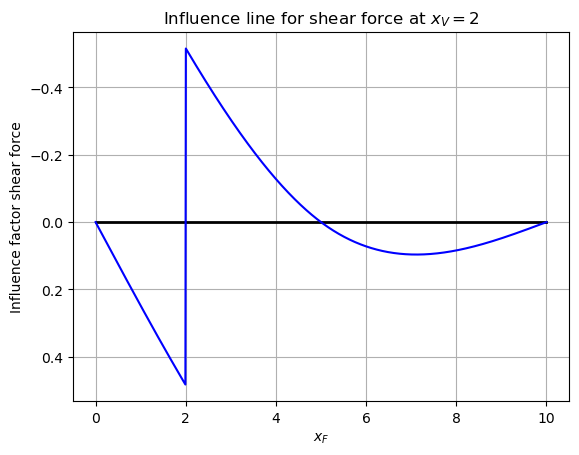

In [32]:
%matplotlib inline
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(phi,x)+C4 - sp.SingularityFunction(x,a,0)
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(w.subs(x,L1),0)
eq3 = sp.Eq(w.subs(x,L1+L2),0)
eq4 = sp.Eq(M.subs(x,0),0)
eq5 = sp.Eq(M.subs(x,L1+L2),0)
eq6 = sp.Eq(V.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,L1+L2+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
V_inf_numpy = sp.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_inf_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for shear force at $x_V = 2$'
axs.set_title(title0);

Piecewise((a - 15/8, a < 5), (a - 65/8, a < 10), (0, True))

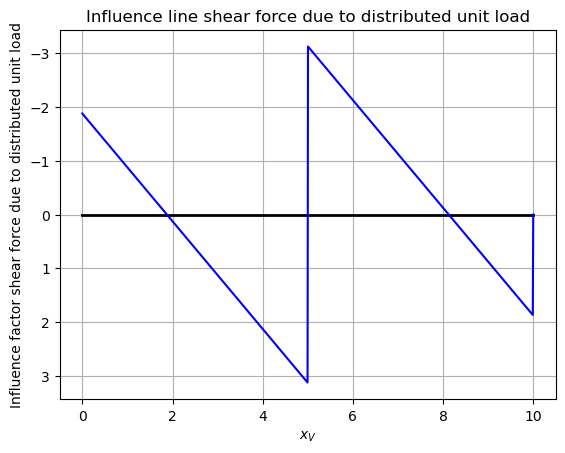

In [11]:
%matplotlib inline
V_line_q = sp.integrate(w_sol.subs([(L1,5),(L2,5),(EI,5000)]),(x,0,10)).rewrite(sp.Piecewise).simplify()
V_line_q_numpy = sp.lambdify(a,V_line_q)
display(V_line_q)

x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_line_q_numpy(a=x_plot),color="blue")
plt.xlabel("$x_V$")
plt.ylabel("Influence factor shear force due to distributed unit load")
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line shear force due to distributed unit load'
axs.set_title(title0);

## Comparison M-line, influence line for moment at $x = ...$ and influence line for moment due to distributed load ##

In [12]:
def func(a,b):
    x = np.linspace(0,10,100)
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))
    axs[0,0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[0,0].grid()
    axs[0,0].axis('equal')
    axs[0,0].plot(x,M_numpy(5,5,b,5000,x),color='blue')
    axs[0,0].plot(a,M_numpy(5,5,b,5000,a),marker='o')
    axs[0,0].annotate('%.2f kNm' % M_numpy(5,5,b,5000,a),xy = [a,M_numpy(5,5,b,5000,a)+0.5])
    axs[0,0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0,0].invert_yaxis()
    title0 = 'Moment distribution for unit load at $x_F = '+str(b)+'$, showing moment at $x_M = '+str(a)+'$'
    axs[0,0].set_title(title0)
    axs[1,0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[1,0].grid()
    axs[1,0].axis('equal')
    axs[1,0].plot(x,M_inf_numpy(5,5,a,5000,x),color='blue')
    axs[1,0].plot(b,M_inf_numpy(5,5,a,5000,b),marker='o')
    axs[1,0].annotate('%.2f kNm' % M_inf_numpy(5,5,a,5000,b),xy = [b,M_inf_numpy(5,5,a,5000,b)+0.5])
    axs[1,0].invert_yaxis()
    axs[1,0].fill_between(x, M_inf_numpy(5,5,a,5000,x), alpha=0.4)
    if a < 5:
        xy_ann = [5,1.5]
    else:
        xy_ann = [0,1.5]
    annotation = 'Moment (at $x_M = '+str(a)+'$ m, due to $q$) \n$ = '+str(np.round(M_line_q_numpy(a),2))+'$ kNm'
    axs[1,0].annotate(annotation, xy = xy_ann)
    title1 = 'Influence line for moment at $x_M = '+str(a)+'$'
    axs[1,0].set_title(title1)
    
    gs = axs[0, 1].get_gridspec()
    axs[0, 1].remove()
    axs[1, 1].remove()
    axbig = fig.add_subplot(gs[0:, -1])
    axbig.plot([0,10],[0,0],color='black',linewidth=2)
    axbig.grid()
    axbig.axis('equal')
    axbig.plot(x,M_line_q_numpy(x),color='blue')
    axbig.plot(a,M_line_q_numpy(a),marker='o')
    axbig.annotate('%.2f kNm' % M_line_q_numpy(a),xy = [a+0.5,M_line_q_numpy(a)])
    axbig.invert_yaxis()
    title1 = 'Influence line for moment for distributed load'
    axbig.set_title(title1)
    
interact(func, a = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location moment $x_M =$ ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}),
         b = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location unit load $x_F = $ ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location moment $x_M =$ ... (m)', layout=Layout(widt…

## Comparison V-line, influence line for shear force at $x = ...$ and influence line for shear force due to distributed load ##

In [13]:
def func(a,b):
    x = np.linspace(0,10,200)
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))
    axs[0,0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[0,0].grid()
    axs[0,0].axis('equal')
    axs[0,0].plot(x,V_numpy(5,5,b,5000,x),color='blue')
    axs[0,0].plot(a,V_numpy(5,5,b,5000,a),marker='o')
    axs[0,0].annotate('%.2f kN' % V_numpy(5,5,b,5000,a),xy = [a,V_numpy(5,5,b,5000,a)+0.5])
    axs[0,0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0,0].invert_yaxis()
    title0 = 'Shear force distribution for force at $x_F = '+str(b)+'$, \n showing value shear force at $x_V = '+str(a)+'$'
    axs[0,0].set_title(title0)
    axs[1,0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[1,0].grid()
    axs[1,0].axis('equal')
    axs[1,0].plot(x,V_inf_numpy(5,5,a,5000,x),color='blue')
    axs[1,0].plot(b,V_inf_numpy(5,5,a,5000,b),marker='o')
    axs[1,0].annotate('%.2f kN' % V_inf_numpy(5,5,a,5000,b),xy = [b,V_inf_numpy(5,5,a,5000,b)+0.5])
    axs[1,0].invert_yaxis()
    title1 = 'Influence line for shear force at $x_V = '+str(a)+'$'
    axs[1,0].set_title(title1)
    axs[1,0].fill_between(x, V_inf_numpy(5,5,a,5000,x), alpha=0.4)
    if a < 5:
        xy_ann = [5,1.5]
    else:
        xy_ann = [0,1.5]
    annotation = 'Shear force (at $x_V = '+str(a)+'$ m, due to $q$) \n$ = '+str(np.round(V_line_q_numpy(a),2))+'$ kN'
    axs[1,0].annotate(annotation, xy = xy_ann)
    
    gs = axs[0, 1].get_gridspec()
    axs[0, 1].remove()
    axs[1, 1].remove()
    axbig = fig.add_subplot(gs[0:, -1])
    axbig.plot([0,10],[0,0],color='black',linewidth=2)
    axbig.grid()
    axbig.axis('equal')
    axbig.plot(x,V_line_q_numpy(x),color='blue')
    axbig.plot(a,V_line_q_numpy(a),marker='o')
    axbig.annotate('%.2f kNm' % V_line_q_numpy(a),xy = [a+0.5,V_line_q_numpy(a)])
    axbig.invert_yaxis()
    title1 = 'Influence line for distributed load'
    axbig.set_title(title1)
    
interact(func, a = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location shear force $x_V$ = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}),
         b = widgets.FloatSlider(min=0, max=10, value=2, step=0.2, description="Location force $x_F$ = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location shear force $x_V$ = ... (m)', layout=Layout…